In [84]:
import yfinance as yf
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import JSON

In [89]:
def scrappy(index):
  url = "https://finance.yahoo.com/quote/" + index + "/financials/?guccounter=1"
  response = requests.get(url, headers={
    "Accept":"text/html",
    "User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36",
    "Sec-CH-Ua":"\"Chromium\";v=\"130\", \"Google Chrome\";v=\"130\", \"Not?A_Brand\";v=\"99\"",
    "Sec-CH-Ua-Mobile":"?0",
    "Sec-Fetch-Dest":"document",
    "Sec-Fetch-Mode":"navigate",
    "Sec-Fetch-Site":"same-origin",
    "Sec-Fetch-User":"?1",
    "Upgrade-Insecure-Requests":"1",
    "Priority":"u=0, i"
  })
  soup = BeautifulSoup(response.content, "html.parser")
  table = soup.find_all('script')
  scripts_with_data_url = soup.find_all('script', attrs={'data-url': True})
  filtered_scripts = [
    script for script in scripts_with_data_url
    if script.get('data-url', '').startswith("https://query1.finance.yahoo.com/v10/finance/quoteSummary/")
  ]
  first_script = filtered_scripts[0]
  data_url_value = first_script['data-url']
  json_data = json.loads(first_script.string)
  json_value = json.loads(json_data["body"])
  data = pd.DataFrame(json_value["quoteSummary"]["result"][0]["earnings"]["financialsChart"]["yearly"])
  data['revenue_raw'] = data['revenue'].apply(lambda x: x['raw'])
  data['revenue_fmt'] = data['revenue'].apply(lambda x: x['fmt'])
  data['revenue_longFmt'] = data['revenue'].apply(lambda x: x['longFmt'])
  data['earnings_raw'] = data['earnings'].apply(lambda x: x['raw'])
  data['earnings_fmt'] = data['earnings'].apply(lambda x: x['fmt'])
  data['earnings_longFmt'] = data['earnings'].apply(lambda x: x['longFmt'])
  data = data.drop(columns=['revenue', 'earnings'])
  return data;


In [92]:
def make_graph(data, label, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label=label, color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.show()

In [110]:
def make_graph_revenue(data, label, title):
  data['revenue_raw_million'] = data['revenue_raw'] / 1_000_000
  data['earnings_raw_million'] = data['earnings_raw'] / 1_000_000

  # Graficar ingresos y ganancias por año
  plt.figure(figsize=(10, 6))

  # Graficar los ingresos
  plt.bar(data['date'] - 0.2, data['revenue_raw_million'], width=0.4, label='Revenue (millions)', color='skyblue')

  # Graficar las ganancias
  plt.bar(data['date'] + 0.2, data['earnings_raw_million'], width=0.4, label='Earnings (millions)', color='orange')

  # Añadir etiquetas, título y leyenda
  plt.xlabel('Year')
  plt.ylabel('Amount in USD (Millions)')
  plt.title('Yearly Revenue and Earnings')
  plt.legend()

  # Mostrar el gráfico
  plt.tight_layout()
  plt.show()

# Question 1. Using yfinance to Extract Stock Data

In [21]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history()
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-09 00:00:00-04:00,243.820007,247.429993,239.509995,241.050003,66289500,0.0,0.0
2024-10-10 00:00:00-04:00,241.809998,242.789993,232.339996,238.770004,83087100,0.0,0.0
2024-10-11 00:00:00-04:00,220.130005,223.339996,214.380005,217.800003,142628900,0.0,0.0
2024-10-14 00:00:00-04:00,220.130005,221.910004,213.740005,219.160004,86291900,0.0,0.0
2024-10-15 00:00:00-04:00,220.009995,224.259995,217.119995,219.570007,62988800,0.0,0.0


# Question 2. Using Webscraping to Extract Tesla Revenue Data

In [90]:
tesla_revenue = scrappy("TSLA")

tesla_revenue

,date,revenue_raw,revenue_fmt,revenue_longFmt,earnings_raw,earnings_fmt,earnings_longFmt
0,2020,31536000000,31.54B,"31,536,000,000",721000000,721M,"721,000,000"
1,2021,53823000000,53.82B,"53,823,000,000",5519000000,5.52B,"5,519,000,000"
2,2022,81462000000,81.46B,"81,462,000,000",12556000000,12.56B,"12,556,000,000"
3,2023,96773000000,96.77B,"96,773,000,000",14997000000,15B,"14,997,000,000"


# Question 3. Using yfinance to Extract GameStop Stock Data

In [23]:
gme = yf.Ticker("GME")
gme_data = gme.history()
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-09 00:00:00-04:00,20.500000,20.740000,20.299999,20.50,3914000,0.0,0.0
2024-10-10 00:00:00-04:00,20.469999,21.049999,20.379999,20.91,4180800,0.0,0.0
2024-10-11 00:00:00-04:00,20.660000,21.219999,20.660000,20.83,3931600,0.0,0.0
2024-10-14 00:00:00-04:00,20.750000,21.670000,20.459999,21.33,6636600,0.0,0.0
2024-10-15 00:00:00-04:00,21.450001,21.680000,20.980000,21.27,4851900,0.0,0.0


# Question 4. Using Webscraping to Extract GameStop Revenue Data

In [101]:
gme_revenue = scrappy("GME")

gme_revenue

,date,revenue_raw,revenue_fmt,revenue_longFmt,earnings_raw,earnings_fmt,earnings_longFmt
0,2021,5089800000,5.09B,"5,089,800,000",-215300000,-215.3M,"-215,300,000"
1,2022,6010700000,6.01B,"6,010,700,000",-381300000,-381.3M,"-381,300,000"
2,2023,5927200000,5.93B,"5,927,200,000",-313100000,-313.1M,"-313,100,000"
3,2024,5272800000,5.27B,"5,272,800,000",6700000,6.7M,"6,700,000"


# Question 5. Plot Tesla Stock Graph

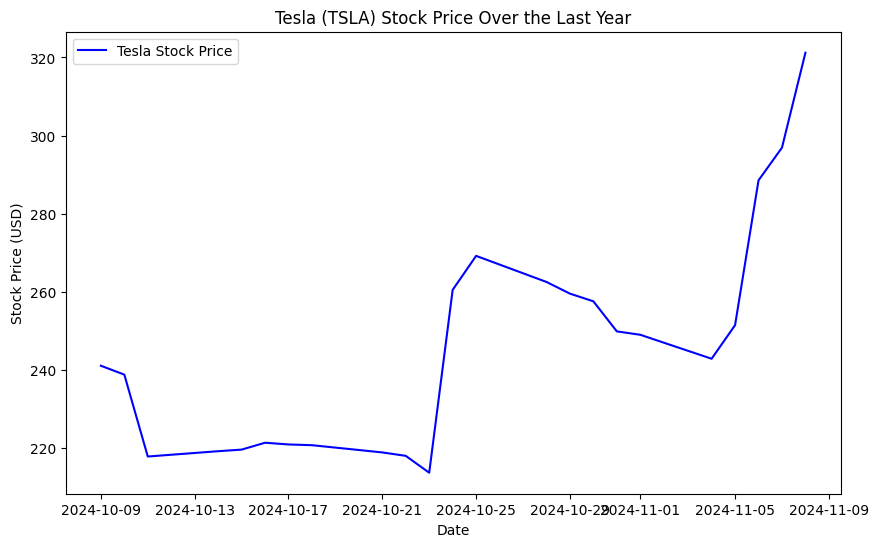

In [93]:
make_graph(tesla_data, "Tesla Stock Price", "Tesla (TSLA) Stock Price Over the Last Year")

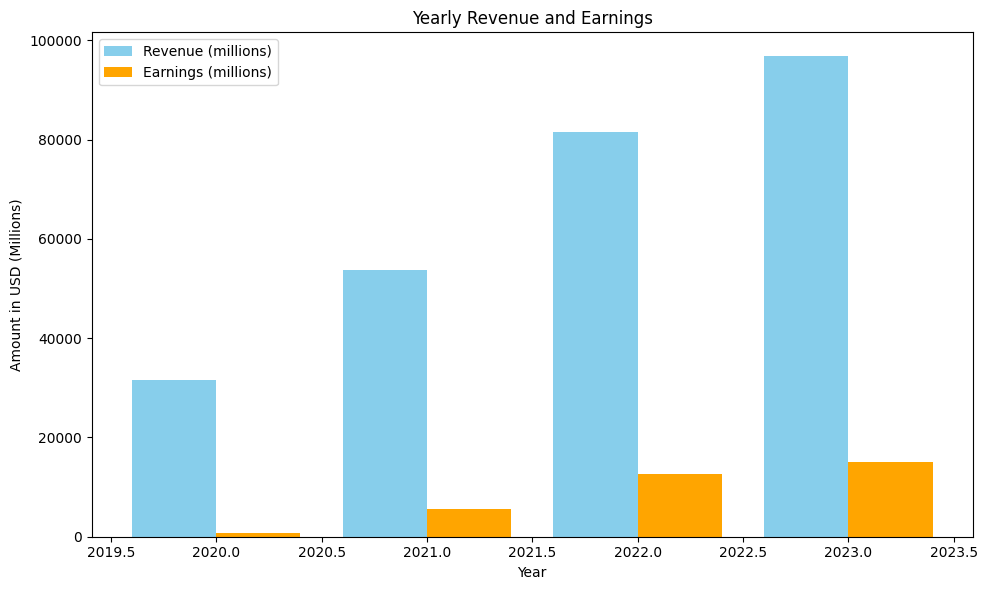

In [111]:
make_graph_revenue(tesla_revenue, "Tesla Revenue", "Tesla (TSLA) Revenue")

# Question 6. Plot GameStop Stock Graph

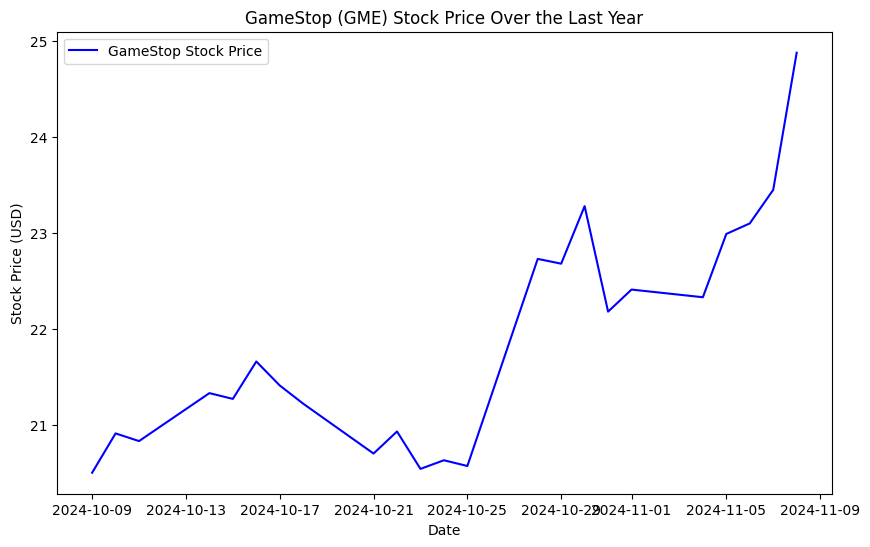

In [33]:
make_graph(gme_data, "GameStop Stock Price", "GameStop (GME) Stock Price Over the Last Year")

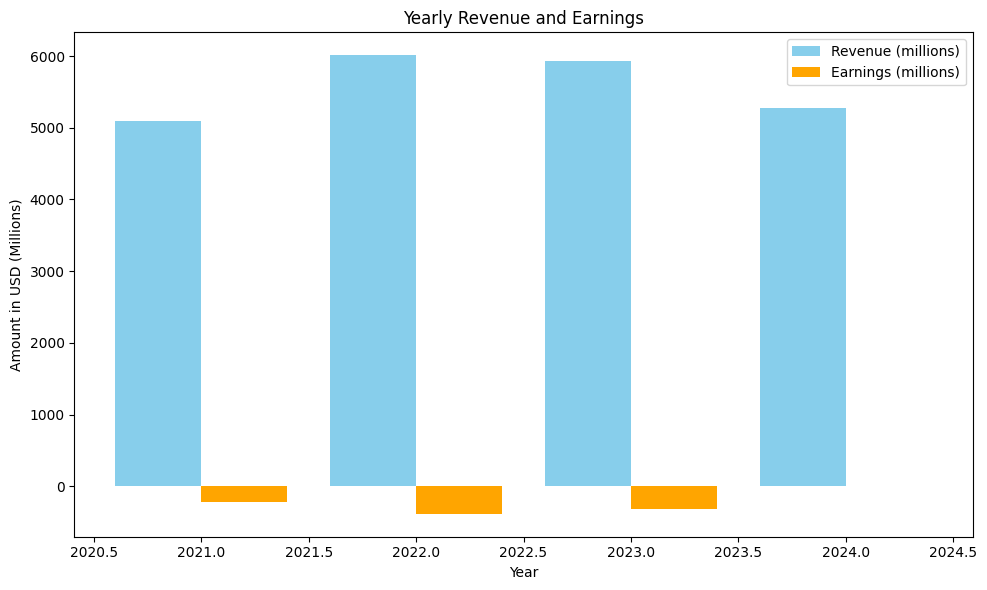

In [113]:
make_graph_revenue(gme_revenue, "GameStop Revenue", "GameStop (GME) Revenue")